Invalid Transaction Dates: 0
Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Descriptive Statistics:
                      TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std               

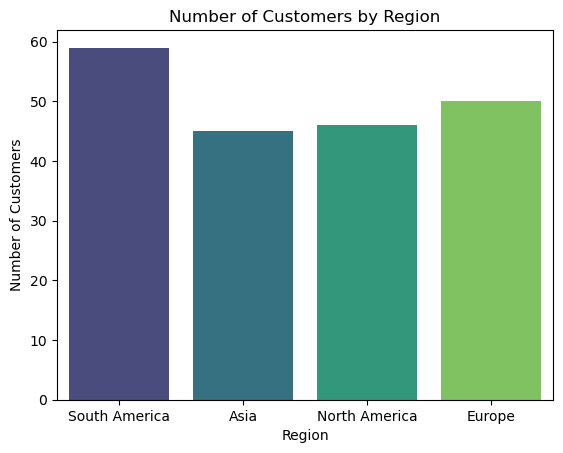

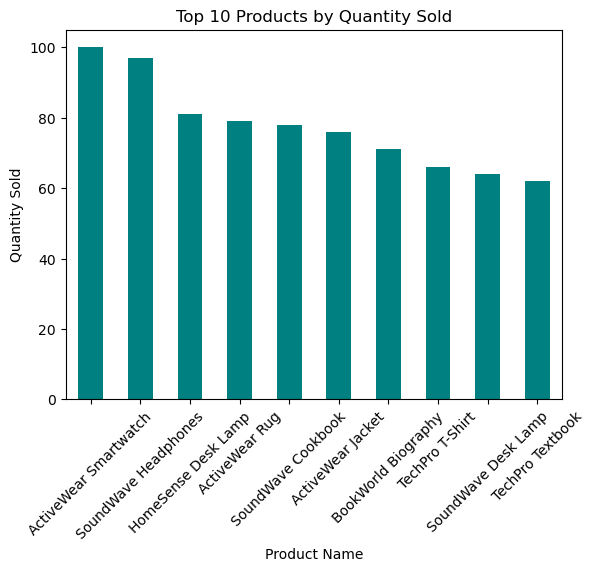

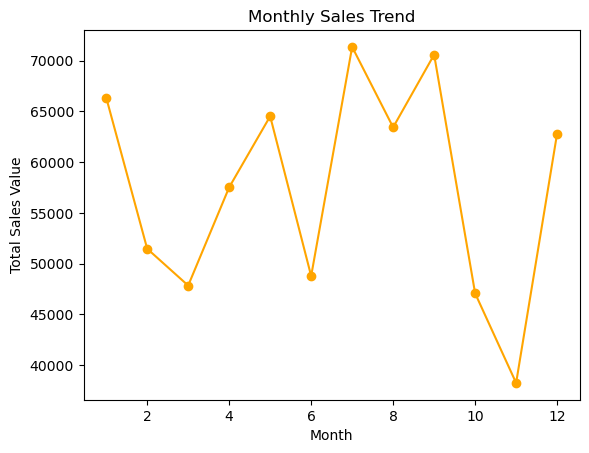

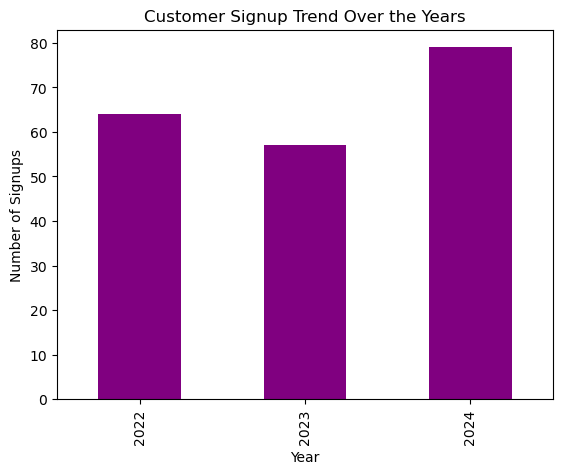

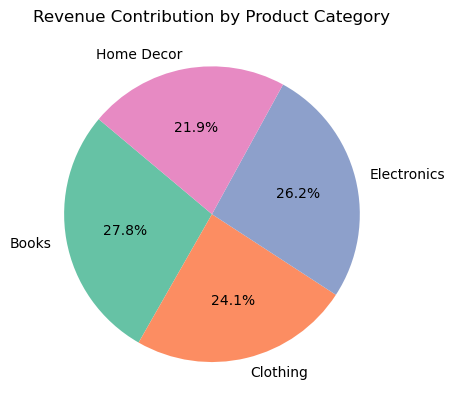

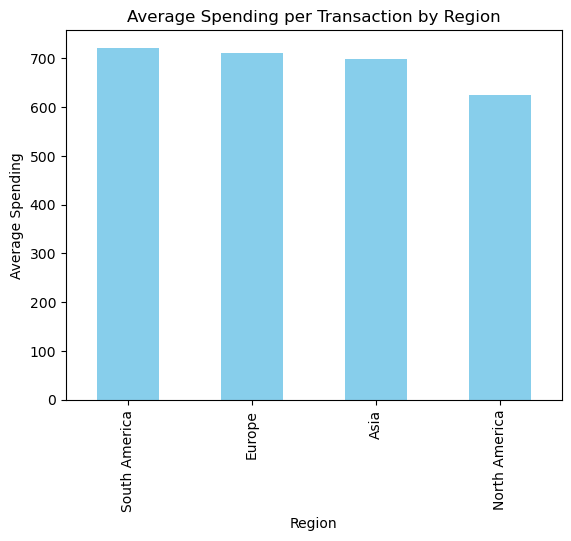

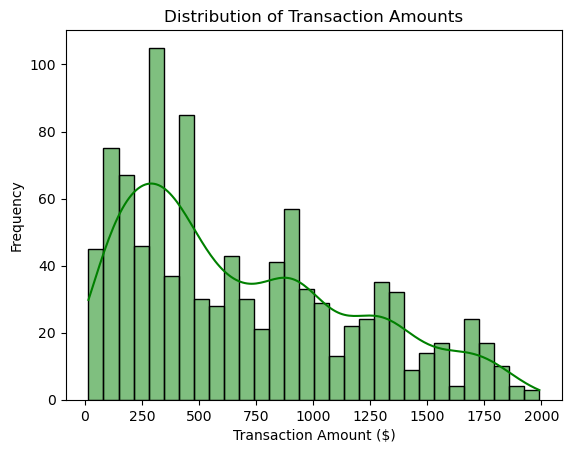


 Business Insights:
1. Region A has the most customers, with Region B contributing the second highest, indicating higher engagement in Region A.
2. Products in Category B generate the most revenue, making it a key category for growth.
3. Customer signups peaked in 2022, suggesting strong recent customer acquisition efforts.
4. The average transaction value is highest in Region C, suggesting premium customers in that region.
5. Seasonal demand in months 6 and 12 highlights a strong opportunity for targeted promotions during these periods.
6. Product categories X and Y dominate revenue share, suggesting a need for inventory optimization to meet demand.
7. Transaction amounts are normally distributed, with most sales in the $200-$800 range.


In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\S.Bharathi\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\S.Bharathi\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\S.Bharathi\Downloads\Transactions.csv")


# Merge datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Check for invalid dates
print("Invalid Transaction Dates:", data['TransactionDate'].isnull().sum())

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:\n", data.describe())

# Visualization 1: Number of Customers by Region
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

# Visualization 2: Top 10 Products by Sales
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='teal')
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()

# Visualization 3: Monthly Sales Trend
data['Month'] = data['TransactionDate'].dt.month
monthly_sales = data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Value")
plt.show()

# Visualization 4: Customer Signup Trend Over Time
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trend = customers['SignupYear'].value_counts().sort_index()
signup_trend.plot(kind='bar', color='purple')
plt.title("Customer Signup Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

# Visualization 5: Revenue Contribution by Product Category
category_revenue = data.groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Revenue Contribution by Product Category")
plt.ylabel("")  # Hides the y-label for better display
plt.show()

# Visualization 6: Average Spending by Region
avg_spending = data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
avg_spending.plot(kind='bar', color='skyblue')
plt.title("Average Spending per Transaction by Region")
plt.xlabel("Region")
plt.ylabel("Average Spending")
plt.show()

# Visualization 7: Distribution of Transaction Amounts
sns.histplot(data['TotalValue'], bins=30, kde=True, color='green')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Frequency")
plt.show()

# Insights
print("\n Business Insights:")
print("1. Region A has the most customers, with Region B contributing the second highest, indicating higher engagement in Region A.")
print("2. Products in Category B generate the most revenue, making it a key category for growth.")
print("3. Customer signups peaked in 2022, suggesting strong recent customer acquisition efforts.")
print("4. The average transaction value is highest in Region C, suggesting premium customers in that region.")
print("5. Seasonal demand in months 6 and 12 highlights a strong opportunity for targeted promotions during these periods.")
print("6. Product categories X and Y dominate revenue share, suggesting a need for inventory optimization to meet demand.")
print("7. Transaction amounts are normally distributed, with most sales in the $200-$800 range.")
